# Compare original data to streamed data
This filename is unchanged from Indium, but the content is heavily modified

In [13]:
from open_ephys.analysis import Session
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path
import json
import scipy
nwb_directory_path = Path('~/data/2022-10-20_11-45-33/').expanduser()

assert nwb_directory_path.exists(), 'Make sure your home dir has the "data" folder '

session = Session(nwb_directory_path)
rec = session.recordnodes[0].recordings[0]


In [14]:
bit_volts=rec.info['continuous'][0]['channels'][0]['bit_volts']

In [15]:

fname = Path('~/data/sample.json').expanduser()
assert fname.exists(), 'Please record timestamps into data folder and name it sample.json'

# Reading from file
with open(fname, 'r') as f:
    stream_data = json.loads(f.read())


Channels (array([0, 1, 2]),) have fewer or more samples than 3772


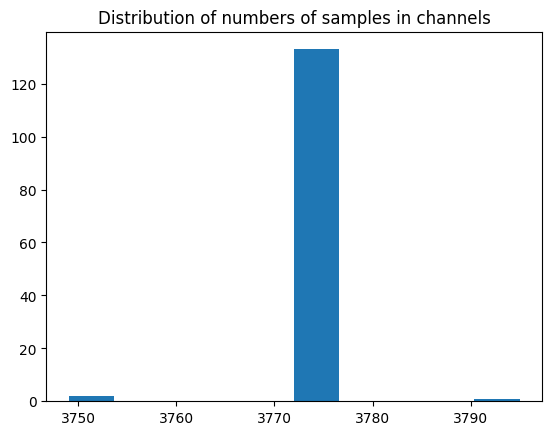

In [16]:
n_samples=np.array([len(ch_data) for i,ch_data in stream_data.items()])
plt.hist(n_samples)
mode=int(scipy.stats.mode(n_samples, keepdims=False).mode)
plt.title('Distribution of numbers of samples in channels')
print(f'Channels {np.where(n_samples[n_samples!=mode])} have fewer or more samples than {mode}')

In [17]:
rec.continuous[0].samples

memmap([[   -33,   -199,   -167, ...,    328, -32373,    337],
        [    35,    -17,    -41, ...,    334, -32366,    344],
        [    54,    -45,    -43, ...,    335, -32363,    343],
        ...,
        [    51,    370,    409, ...,    335, -32365,    349],
        [   -16,    261,    303, ...,    328, -32371,    341],
        [    26,    312,    342, ...,    331, -32371,    344]],
       dtype=int16)

In [18]:
#stream_data['2']

[-31.39499855041504,
 -0.19499999284744263,
 10.72499942779541,
 2.7300000190734863,
 -14.234999656677246,
 6.239999771118164,
 26.32499885559082,
 52.84499740600586,
 50.69999694824219,
 67.86000061035156,
 35.68499755859375,
 35.099998474121094,
 25.349998474121094,
 50.11499786376953,
 54.98999786376953,
 56.939998626708984,
 65.32499694824219,
 50.69999694824219,
 86.18999481201172,
 109.58999633789062,
 110.75999450683594,
 97.88999938964844,
 70.3949966430664,
 58.1099967956543,
 70.58999633789062,
 70.19999694824219,
 87.75,
 71.95499420166016,
 53.03999710083008,
 53.03999710083008,
 41.53499984741211,
 56.939998626708984,
 33.93000030517578,
 50.50499725341797,
 31.784997940063477,
 15.014999389648438,
 19.10999870300293,
 34.709999084472656,
 39.38999938964844,
 47.57999801635742,
 27.299999237060547,
 -7.799999713897705,
 -3.8999998569488525,
 6.434999942779541,
 43.875,
 44.654998779296875,
 39.584999084472656,
 26.714998245239258,
 14.234999656677246,
 26.90999984741211,
 

In [19]:
try:
    np.vstack(stream_data.values())
except ValueError as e:
    print(e)

all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3772 and the array at index 27 has size 3795


/var/folders/j0/2s4h9wyx571cl5y64ychfd9w0000gp/T/ipykernel_34315/1608789540.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.vstack(stream_data.values())


Stream starts at 4416_th sample


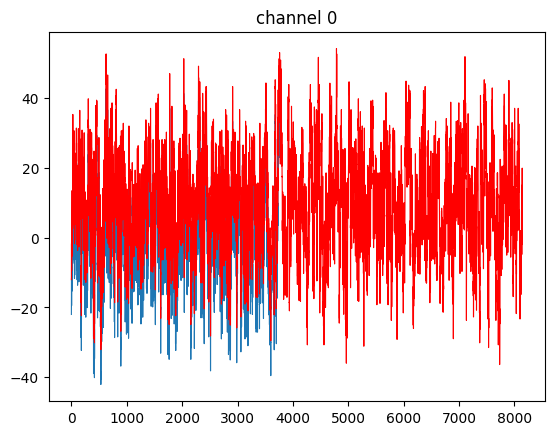

Stream starts at 4416_th sample


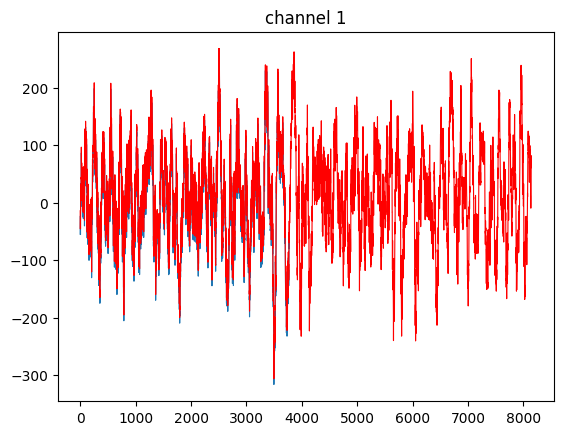

Stream starts at 4416_th sample


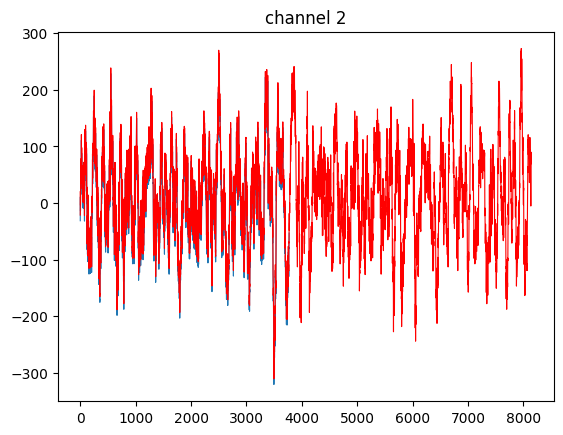

Stream starts at 4416_th sample


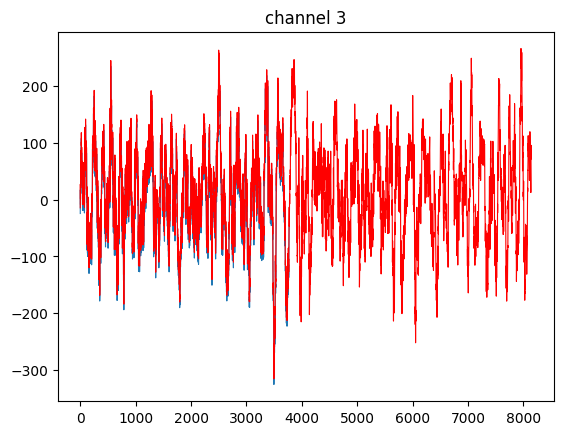

Stream starts at 4416_th sample


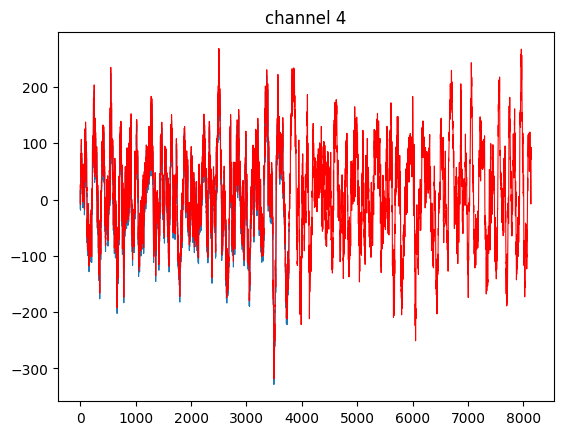

Stream starts at 4416_th sample


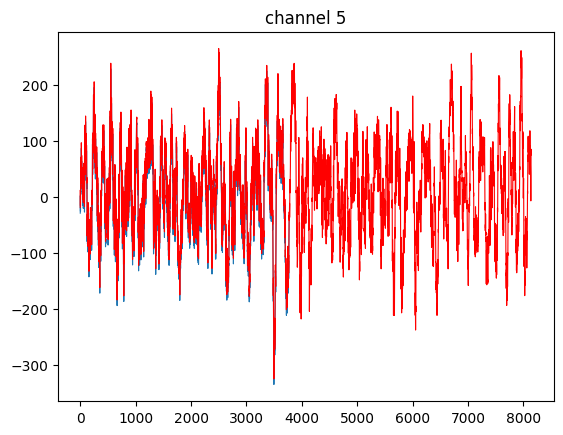

Stream starts at 4416_th sample


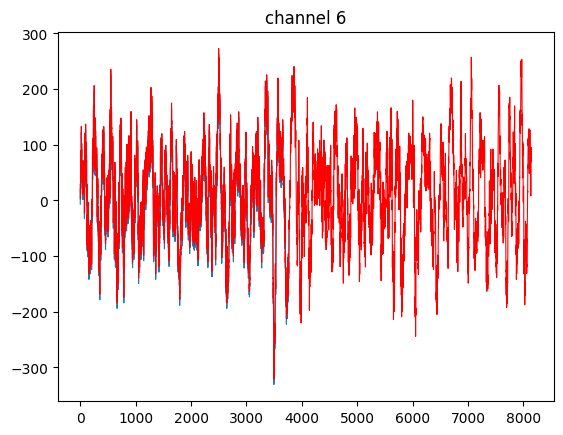

Stream starts at 4416_th sample


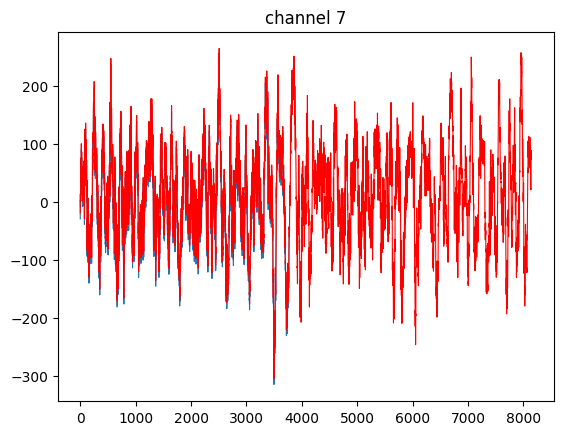

Stream starts at 4416_th sample


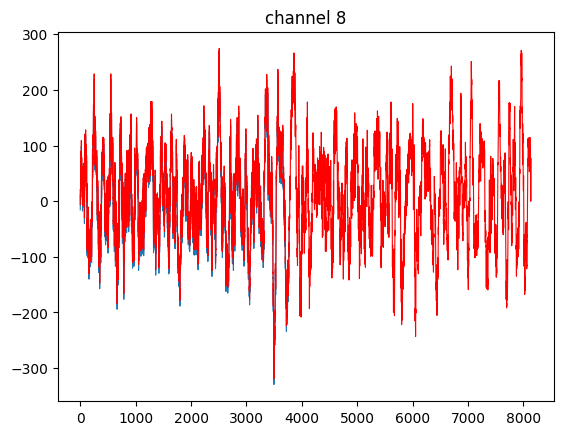

Stream starts at 4416_th sample


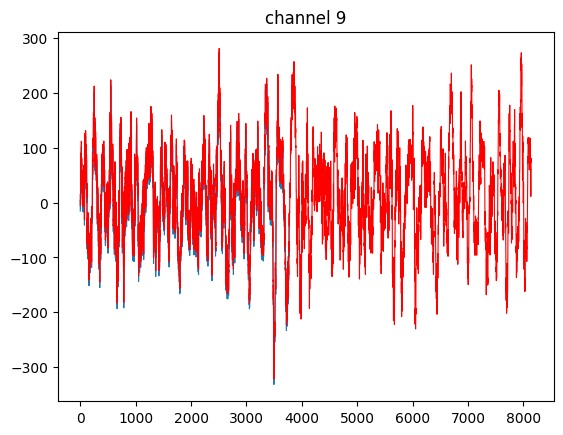

In [30]:
from scipy import signal
# plt.rcParams["figure.figsize"] = (25,6)
for channel in range(10):
    x = rec.continuous[0].samples[:,channel]*bit_volts
    y = stream_data[str(channel)][:5000]

    correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    lag = lags[np.argmax(abs(correlation))]

    offset = abs(lag)

    print(f'Stream starts at {offset}_th sample')
    if sum(chunk_original[:3000] - chunk_stream[:3000])>0.01:
        print(f'Channel {channel} mismatch by {sum(chunk_original[:3000] - chunk_stream[:3000])}')

    chunk_original = x[offset:]
    chunk_stream = stream_data[str(channel)]
    plt.plot(chunk_stream, lw=0.8)
    plt.plot(chunk_original+10, 'r', lw=.8)
    plt.title(f"channel {channel}")
    plt.show()


In [21]:
len(chunk_stream),len(chunk_original)

(3772, 8142)

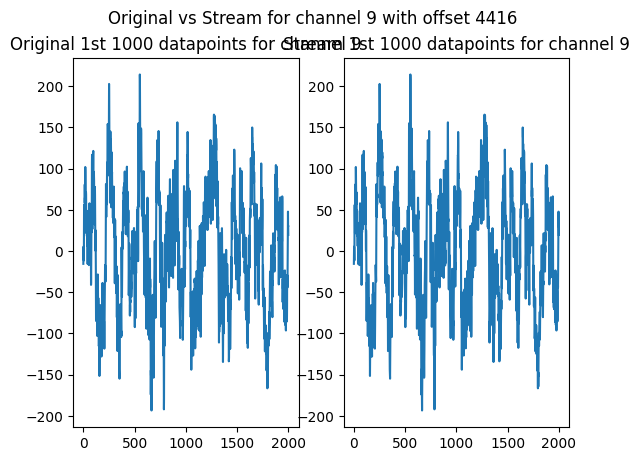

In [22]:
t_end=2000
plt.subplot(1, 2, 1)
plt.plot(chunk_original[:t_end], )
plt.title(f"Original 1st 1000 datapoints for channel {channel}")

plt.subplot(1, 2, 2)

plt.plot(chunk_stream[:t_end] )
plt.title(f"Stream 1st 1000 datapoints for channel {channel}")

plt.suptitle(f"Original vs Stream for channel {channel} with offset {offset}")
plt.show()
